In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "/Users/nicolasmcontreras/Downloads/analysis_test_bard - Sheet1.csv"
df = pd.read_csv(file_path)


In [4]:
# Display summary statistics of the dataset
print("Summary of the Dataset:")
print(df.describe())

Summary of the Dataset:
          Sessions        Users  Engaged sessions  \
count    44.000000    44.000000         44.000000   
mean    204.954545   159.977273        139.613636   
std     690.163680   548.827354        461.497472   
min       1.000000     1.000000          0.000000   
25%       2.000000     1.000000          1.750000   
50%       9.000000     4.000000          5.000000   
75%      38.250000    29.500000         28.250000   
max    3550.000000  2936.000000       2429.000000   

       Average engagement time per session  Engaged sessions per user  \
count                            44.000000                    44.0000   
mean                             36.306818                     2.3000   
std                              29.415606                     6.6336   
min                               0.000000                     0.0000   
25%                              12.000000                     0.8000   
50%                              37.750000                  

In [5]:
# 1. Top Performing Channels
top_channels = df.nlargest(9, 'Sessions')[['Session source/medium', 'Sessions', 'Users', 'Conversions']]
print("Top Performing Channels:")
print(top_channels)

Top Performing Channels:
        Session source/medium  Sessions  Users  Conversions
0                  meta / ads      3550   2936           19
1           (direct) / (none)      2779   2003           10
2  l.instagram.com / referral      1198   1107            3
3            google / organic       728    441           11
4     facebook.com / referral       112    112            0
5       shopify_email / email        73     39            2
6    instagram.com / referral        63     60            0
7      liforme.com / referral        62      1            0
8             judgeme / email        60     25            0


In [6]:
# 2. Engagement Metrics
engagement_metrics = df[['Session source/medium', 'Average engagement time per session', 'Engaged sessions per user', 'Events per session']]
print("\nEngagement Metrics:")
print(engagement_metrics)



Engagement Metrics:
                   Session source/medium  Average engagement time per session  \
0                             meta / ads                                 43.2   
1                      (direct) / (none)                                 30.9   
2             l.instagram.com / referral                                 41.1   
3                       google / organic                                 64.1   
4                facebook.com / referral                                  0.1   
5                  shopify_email / email                                100.2   
6               instagram.com / referral                                 19.5   
7                 liforme.com / referral                                 40.5   
8                        judgeme / email                                 58.2   
9                   linktr.ee / referral                                 43.8   
10                          google / cpc                                 37.5   
11     

In [8]:
# Engagement Metrics 2
engagement_metrics_2 = df[['Average engagement time per session', 'Engaged sessions per user', 'Events per session']]

# Display mean and standard deviation
engagement_stats = engagement_metrics_2.describe().loc[['mean', 'std']]
print("Mean and Standard Deviation for Engagement Metrics:")
print(engagement_stats)


Mean and Standard Deviation for Engagement Metrics:
      Average engagement time per session  Engaged sessions per user  \
mean                            36.306818                     2.3000   
std                             29.415606                     6.6336   

      Events per session  
mean            9.681818  
std             7.113311  


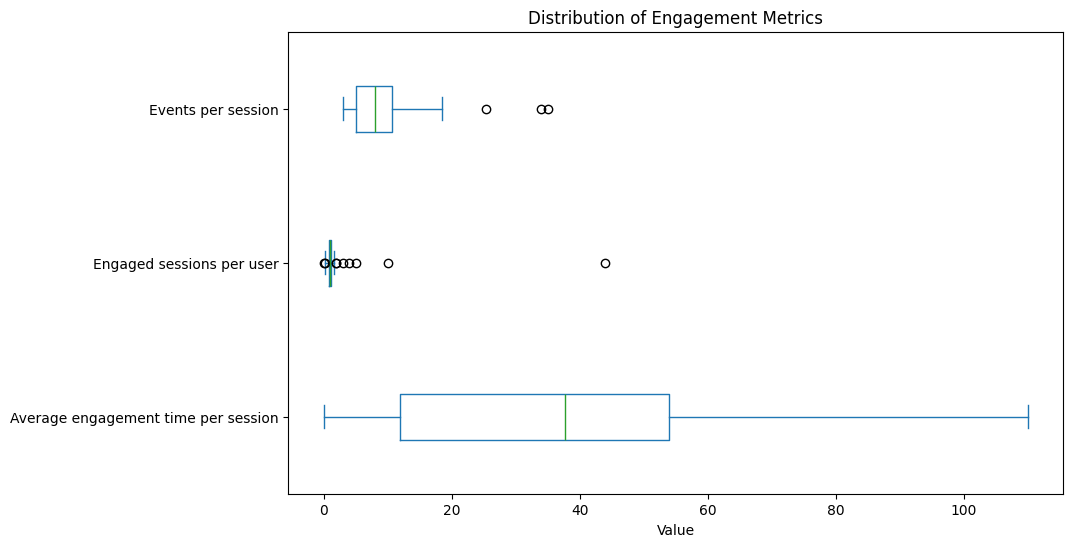

In [9]:
# Visualize the distribution of each metric
engagement_metrics_2.plot(kind='box', vert=False, figsize=(10, 6))
plt.title('Distribution of Engagement Metrics')
plt.xlabel('exValue')
plt.show()

Mean and Standard Deviation for Engagement Metrics:
      Average engagement time per session  Events per session
mean                            36.306818            9.681818
std                             29.415606            7.113311


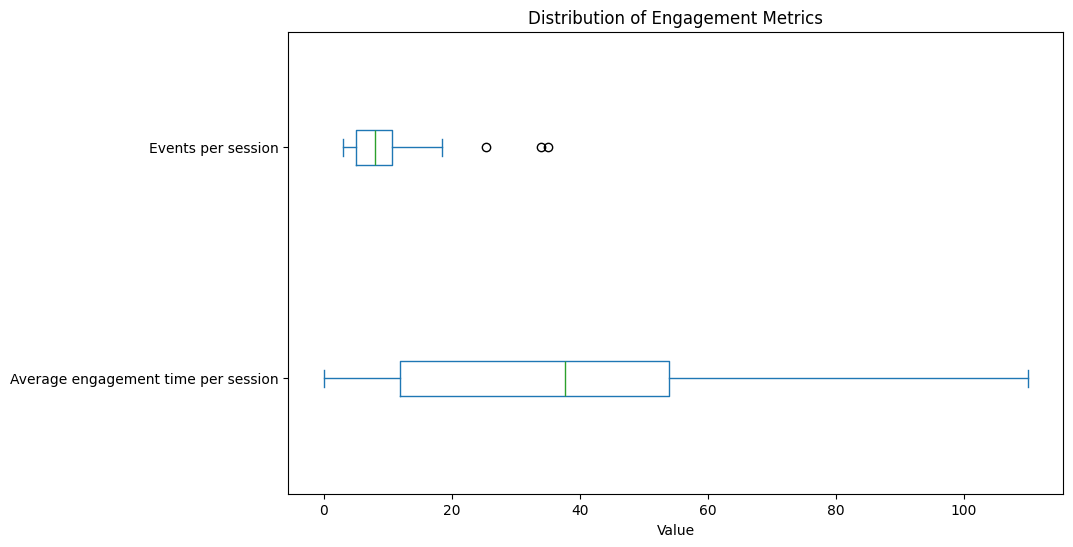

In [10]:
# Exclude "Engaged Sessions per User" from the analysis
engagement_metrics_2 = df[['Average engagement time per session', 'Events per session']]

# Display mean and standard deviation
engagement_stats = engagement_metrics_2.describe().loc[['mean', 'std']]
print("Mean and Standard Deviation for Engagement Metrics:")
print(engagement_stats)

# Visualize the distribution of each metric
engagement_metrics_2.plot(kind='box', vert=False, figsize=(10, 6))
plt.title('Distribution of Engagement Metrics')
plt.xlabel('Value')
plt.show()

Mean and Standard Deviation for Engagement Metrics by Top Channels:
                           Average engagement time per session  \
                                                          mean   
Session source/medium                                            
(direct) / (none)                                         30.9   
facebook.com / referral                                    0.1   
google / organic                                          64.1   
instagram.com / referral                                  19.5   
judgeme / email                                           58.2   
l.instagram.com / referral                                41.1   
liforme.com / referral                                    40.5   
meta / ads                                                43.2   
shopify_email / email                                    100.2   

                           Events per session  
                                         mean  
Session source/medium                      

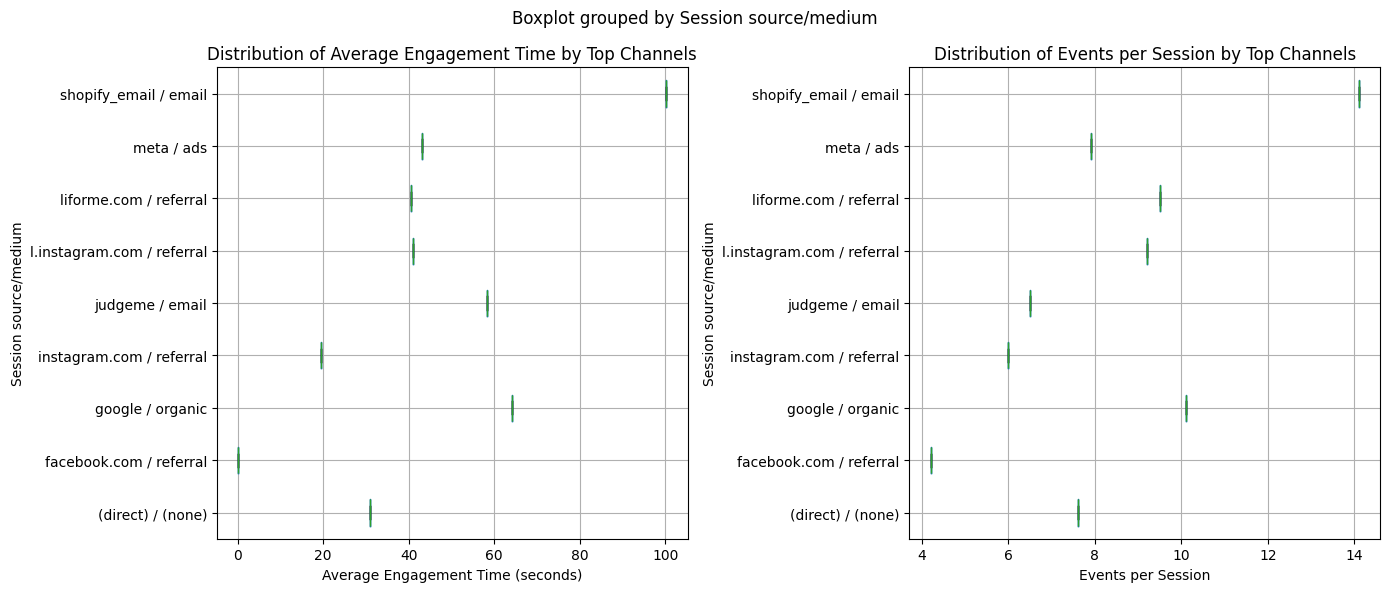

In [13]:
# Extracted list of top channels from the previous analysis
top_channels_extracted = [
    'meta / ads', '(direct) / (none)', 'l.instagram.com / referral',
    'google / organic', 'facebook.com / referral', 'shopify_email / email',
    'instagram.com / referral', 'liforme.com / referral', 'judgeme / email'
]

# Filter the dataset for the top channels
df_top_channels = df[df['Session source/medium'].isin(top_channels_extracted)]

# Select relevant columns for analysis
selected_columns = ['Session source/medium', 'Average engagement time per session', 'Events per session']
engagement_metrics_top_channels = df_top_channels[selected_columns]

# Display mean and standard deviation by source/medium
engagement_stats_by_channel = engagement_metrics_top_channels.groupby('Session source/medium').describe().loc[:, [('Average engagement time per session', 'mean', 'std'), ('Events per session', 'mean', 'std')]]
print("Mean and Standard Deviation for Engagement Metrics by Top Channels:")
print(engagement_stats_by_channel)

# Visualize the distribution of each metric by source/medium
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

engagement_metrics_top_channels.boxplot(column='Average engagement time per session', by='Session source/medium', vert=False, ax=axes[0])
axes[0].set_title('Distribution of Average Engagement Time by Top Channels')
axes[0].set_xlabel('Average Engagement Time (seconds)')

engagement_metrics_top_channels.boxplot(column='Events per session', by='Session source/medium', vert=False, ax=axes[1])
axes[1].set_title('Distribution of Events per Session by Top Channels')
axes[1].set_xlabel('Events per Session')

plt.tight_layout()
plt.show()